In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2016, 2017)

dataSetOps.prepare()
dataSetOps.prepare2()

df = dataSetOps.df

In [4]:
df.head()

,date,open,max,min,close,price,diff,value_d,mavg10,mavg20,...,val_past_60,val_past_61,val_past_62,val_past_63,has_down_v,has_up_v,has_down,has_up,has_not_up,value_nr
999,20160104 094200,1.08547,1.08556,1.08529,1.08543,1.08543,0.00020,2.0,0.72,1.100,...,6.0,-0.9,-3.2,-5.4,NaN,NaN,False,False,False,False
1000,20160104 094300,1.08542,1.08557,1.08532,1.08553,1.08553,-0.00005,-0.5,1.57,2.175,...,1.4,6.0,-0.9,-3.2,NaN,NaN,False,False,False,False
1001,20160104 094400,1.08553,1.08555,1.08538,1.08546,1.08546,0.00010,1.0,1.37,1.595,...,1.7,1.4,6.0,-0.9,NaN,NaN,False,False,False,False
1002,20160104 094500,1.08545,1.08549,1.08493,1.08493,1.08493,-0.00007,-0.7,-3.43,-3.465,...,-5.8,1.7,1.4,6.0,NaN,NaN,False,False,False,False
1003,20160104 094600,1.08487,1.08503,1.08484,1.08503,1.08503,-0.00053,-5.3,-2.26,-2.465,...,-4.2,-5.8,1.7,1.4,NaN,NaN,False,False,False,False


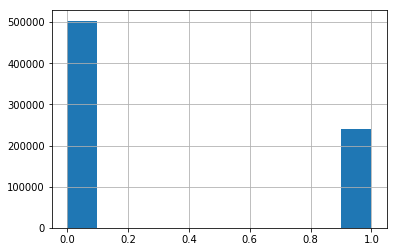

In [5]:
df.value_nr.astype(int).hist()

In [33]:
X = df[['value_d', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value_nr']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Activation

#Initializing Neural Network
classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 5))
# # Adding the output layer
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# # Adding the second hidden layer
# classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# # Adding the output layer
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
hidden_size = 64

classifier.add(LSTM(5))
# if use_dropout:
#     model.add(Dropout(0.5))
classifier.add(TimeDistributed(Dense(5)))
classifier.add(Activation('softmax'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae]
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
train = np.reshape(X_train,(X_train.shape[0], 1, X_train.shape[1]))
classifier.fit(train, y_train, batch_size = 10, epochs = 3)
train.shape

AssertionError: 

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.3)

In [ ]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from lib.helper import AccuracyCalculator

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(classifier.predict(X_test)[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(classifier.predict(X_test)[:,0], y_test)

In [ ]:
risk_hist_df.risk.plot()